# VEHICLE INSURANCE CLAIMS

In [1]:
#import relevant libraries
import pandas as pd     #for dataset manipulation
pd.set_option('mode.chained_assignment', None)

import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Life Cycle for Machine Learning Project

- Understanding the problem statement
- Data collection
- Data checks
- Explanatory and exploratory data analysis
- Data pre-processing
- Model training
- Hyperparameter tuning the best model

## 1. Problem statement
- This project understands certain underlying factors which affect the possibility of a policyholder filing an insurance claim for their respective vehicles within a short term of six months.

## 2. Data collection
- Dataset source - https://www.kaggle.com/datasets/avikumart/analytics-vidhya-nov22-insurance-claims-dataset
- The dataset consists of 44 features, and 58,592 rows.
- For more information on the features, kindly follow the link above.
- Special thanks to Analytics Vidhya for providing the dataset.

### 2.1) Import the dataset

In [2]:
data = pd.read_csv('dataset/data.csv')

In [3]:
#confirm import
data.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
#confirm the dataset size
data.shape

(58592, 44)

## 3. Dataset checks

Perform the following checks for insight on preprocessing:
- Determine the target feature and analyze
- Perform checks on predictors;
    - Check missing values
    - Check for duplicates
    - Check for datatypes
    - Check for unique values
    - Provide statistics of the dataset
    - Check for categorical features within the dataset

### 3.1) Target variables analysis.
- According to the dataset documentation, and personal observation, the target feature is the `is_claim` column.

In [5]:
#display information on the target variable
data.is_claim.info()

<class 'pandas.core.series.Series'>
RangeIndex: 58592 entries, 0 to 58591
Series name: is_claim
Non-Null Count  Dtype
--------------  -----
58592 non-null  int64
dtypes: int64(1)
memory usage: 457.9 KB


In [6]:
#confirm the target variable is binary in nature
data.is_claim.nunique()

2

<Axes: xlabel='is_claim', ylabel='Count'>

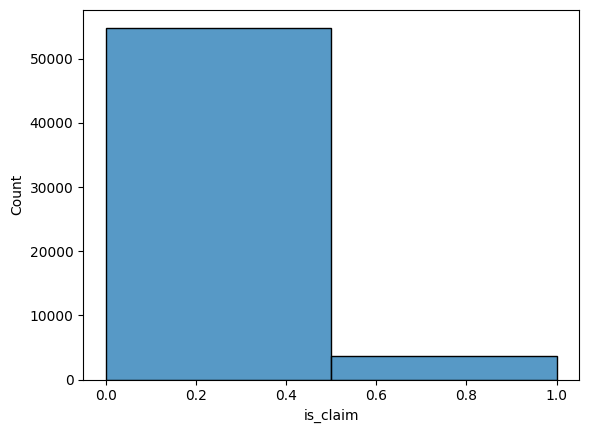

In [7]:
#visualize the distribution
sns.histplot(data.is_claim, bins=2)

In [8]:
#frequency of target distribution
data.is_claim.value_counts() / data.shape[0] * 100

is_claim
0    93.603222
1     6.396778
Name: count, dtype: float64

In [9]:
#check for missing values in the target variable
data.is_claim.isnull().sum()

0

Insights
- The target feature is binary in nature, with 0 indicating no claim was filed, and 1 indicating the insurance claim was filed by the policyholder.
- The target feature is extremely balanced, with majority of policyholders not filing their insurance claims.
- There were no missing values for the target feature.

### 3.2) Predictor features analysis

In [10]:
#set predictors
predictors = data.drop(['is_claim'], axis=1)

In [11]:
#confirm
predictors.shape[1]

43

#### 3.2.1) Missing values

In [12]:
#return a list containing features with missing values
predictors.columns[predictors.isnull().any()].to_list()

[]

There are no missing values in the dataset

#### 3.2.2) Duplicates

In [13]:
data.duplicated().sum()

0

There are no duplicated samples within the dataset.

#### 3.2.3) Data types

In [14]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [15]:
#group into categorical and numerical features
categorical_features = [col for col in predictors.columns if predictors[col].dtype == "O"]
numerical_features = [col for col in predictors.columns if predictors[col].dtype != "O"]

In [16]:
len(categorical_features)

28

In [17]:
len(numerical_features)

15

The dataset has 28 categorical features and 15 numerical features.

#### 3.2.4) Unique values

In [18]:
predictors.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [19]:
#check for unique values based on datatypes
predictors[categorical_features].nunique()

policy_id                           58592
area_cluster                           22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
transmission_type                       2
steering_type                           3
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_washer                   2
is_rear_window_defogger                 2
is_brake_assist                         2
is_power_door_locks                     2
is_central_locking                      2
is_power_steering                 

In [20]:
predictors[numerical_features].nunique()

policy_tenure          58592
age_of_car                49
age_of_policyholder       75
population_density        22
make                       5
airbags                    3
displacement               9
cylinder                   2
gear_box                   2
turning_radius             9
length                     9
width                     10
height                    11
gross_weight              10
ncap_rating                5
dtype: int64

Insights
- The categorical features contains a lot of low cardinality features. 
- The `policy_id` feature having the same number of unique values as the sample space, which is a clear indicator for unique IDs given to each policyholder.
- The numerical features had a lot of discrete features.

#### 3.2.5) Dataset statistics

In [21]:
predictors.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000


Insight
- From the above numerical data description, the features are on different scales.
- There is inconsistency with the mean/median values of the features.
- Most of the numerical data seem to have a comb distribution. 

## 4) Exploratory data analysis

- For categorical features;
    - Split features based on cardinality
    - Remove redundant features.
    - Check rare values.
    - Extract numerical information from categorical features if possible.


- For numerical features;
    - Check distribution 
    - Check outliers
    - Check for collinearity
    - Remove redundant features

### 4.1) Categorical features

#### 4.1.1) Split features based on cardinality

- Set the cardinality thresholds
- Low cardinality features should not have more than 2 unique elements
- Medium cardinality features should have 3 to 10 unique elements
- High cardinality features should have more than 10 unique elements

In [22]:
lo_card = [col for col in categorical_features if predictors[col].nunique() <= 2]   #low cardinality
mid_card = [col for col in categorical_features if predictors[col].nunique() in range(3, 11)] #medium cardinality
hi_card = [col for col in categorical_features if predictors[col].nunique() > 10] #high cardinality

In [23]:
#confirm no categorical features were left out
len(categorical_features) == len(lo_card) + len(mid_card) + len(hi_card)

True

In [24]:
#generate code to list unique elements
def lister(df, cols):
    for i in cols:
        print(i)
        print(list(df[i].unique()))
        print('\n')

In [25]:
#generate function for visualization of categorical features
def viz(df, features:list, a:int, b:int):        # the product of 'a' and 'b' params should >= number of elements in 'features' param.
    plt.figure(figsize=(25, 15))

    for i, col in enumerate(features):
        plt.subplot(a,b, i+1)
        df[col].value_counts().plot.bar()
        plt.ylabel(col)
    plt.tight_layout()

    plt.show()

**Low cardinality features**

In [26]:
len(lo_card)

19

In [27]:
predictors[lo_card].head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,No,No,No,Yes,No,Drum,Manual,No,No,No,No,No,No,No,Yes,No,No,No,Yes
1,No,No,No,Yes,No,Drum,Manual,No,No,No,No,No,No,No,Yes,No,No,No,Yes
2,No,No,No,Yes,No,Drum,Manual,No,No,No,No,No,No,No,Yes,No,No,No,Yes
3,Yes,Yes,No,Yes,Yes,Drum,Automatic,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,No,No,No,No,Yes,Drum,Automatic,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


In [28]:
print(list(predictors['is_esc'].unique()))

['No', 'Yes']


In [29]:
lister(predictors, lo_card)

is_esc
['No', 'Yes']


is_adjustable_steering
['No', 'Yes']


is_tpms
['No', 'Yes']


is_parking_sensors
['Yes', 'No']


is_parking_camera
['No', 'Yes']


rear_brakes_type
['Drum', 'Disc']


transmission_type
['Manual', 'Automatic']


is_front_fog_lights
['No', 'Yes']


is_rear_window_wiper
['No', 'Yes']


is_rear_window_washer
['No', 'Yes']


is_rear_window_defogger
['No', 'Yes']


is_brake_assist
['No', 'Yes']


is_power_door_locks
['No', 'Yes']


is_central_locking
['No', 'Yes']


is_power_steering
['Yes', 'No']


is_driver_seat_height_adjustable
['No', 'Yes']


is_day_night_rear_view_mirror
['No', 'Yes']


is_ecw
['No', 'Yes']


is_speed_alert
['Yes', 'No']




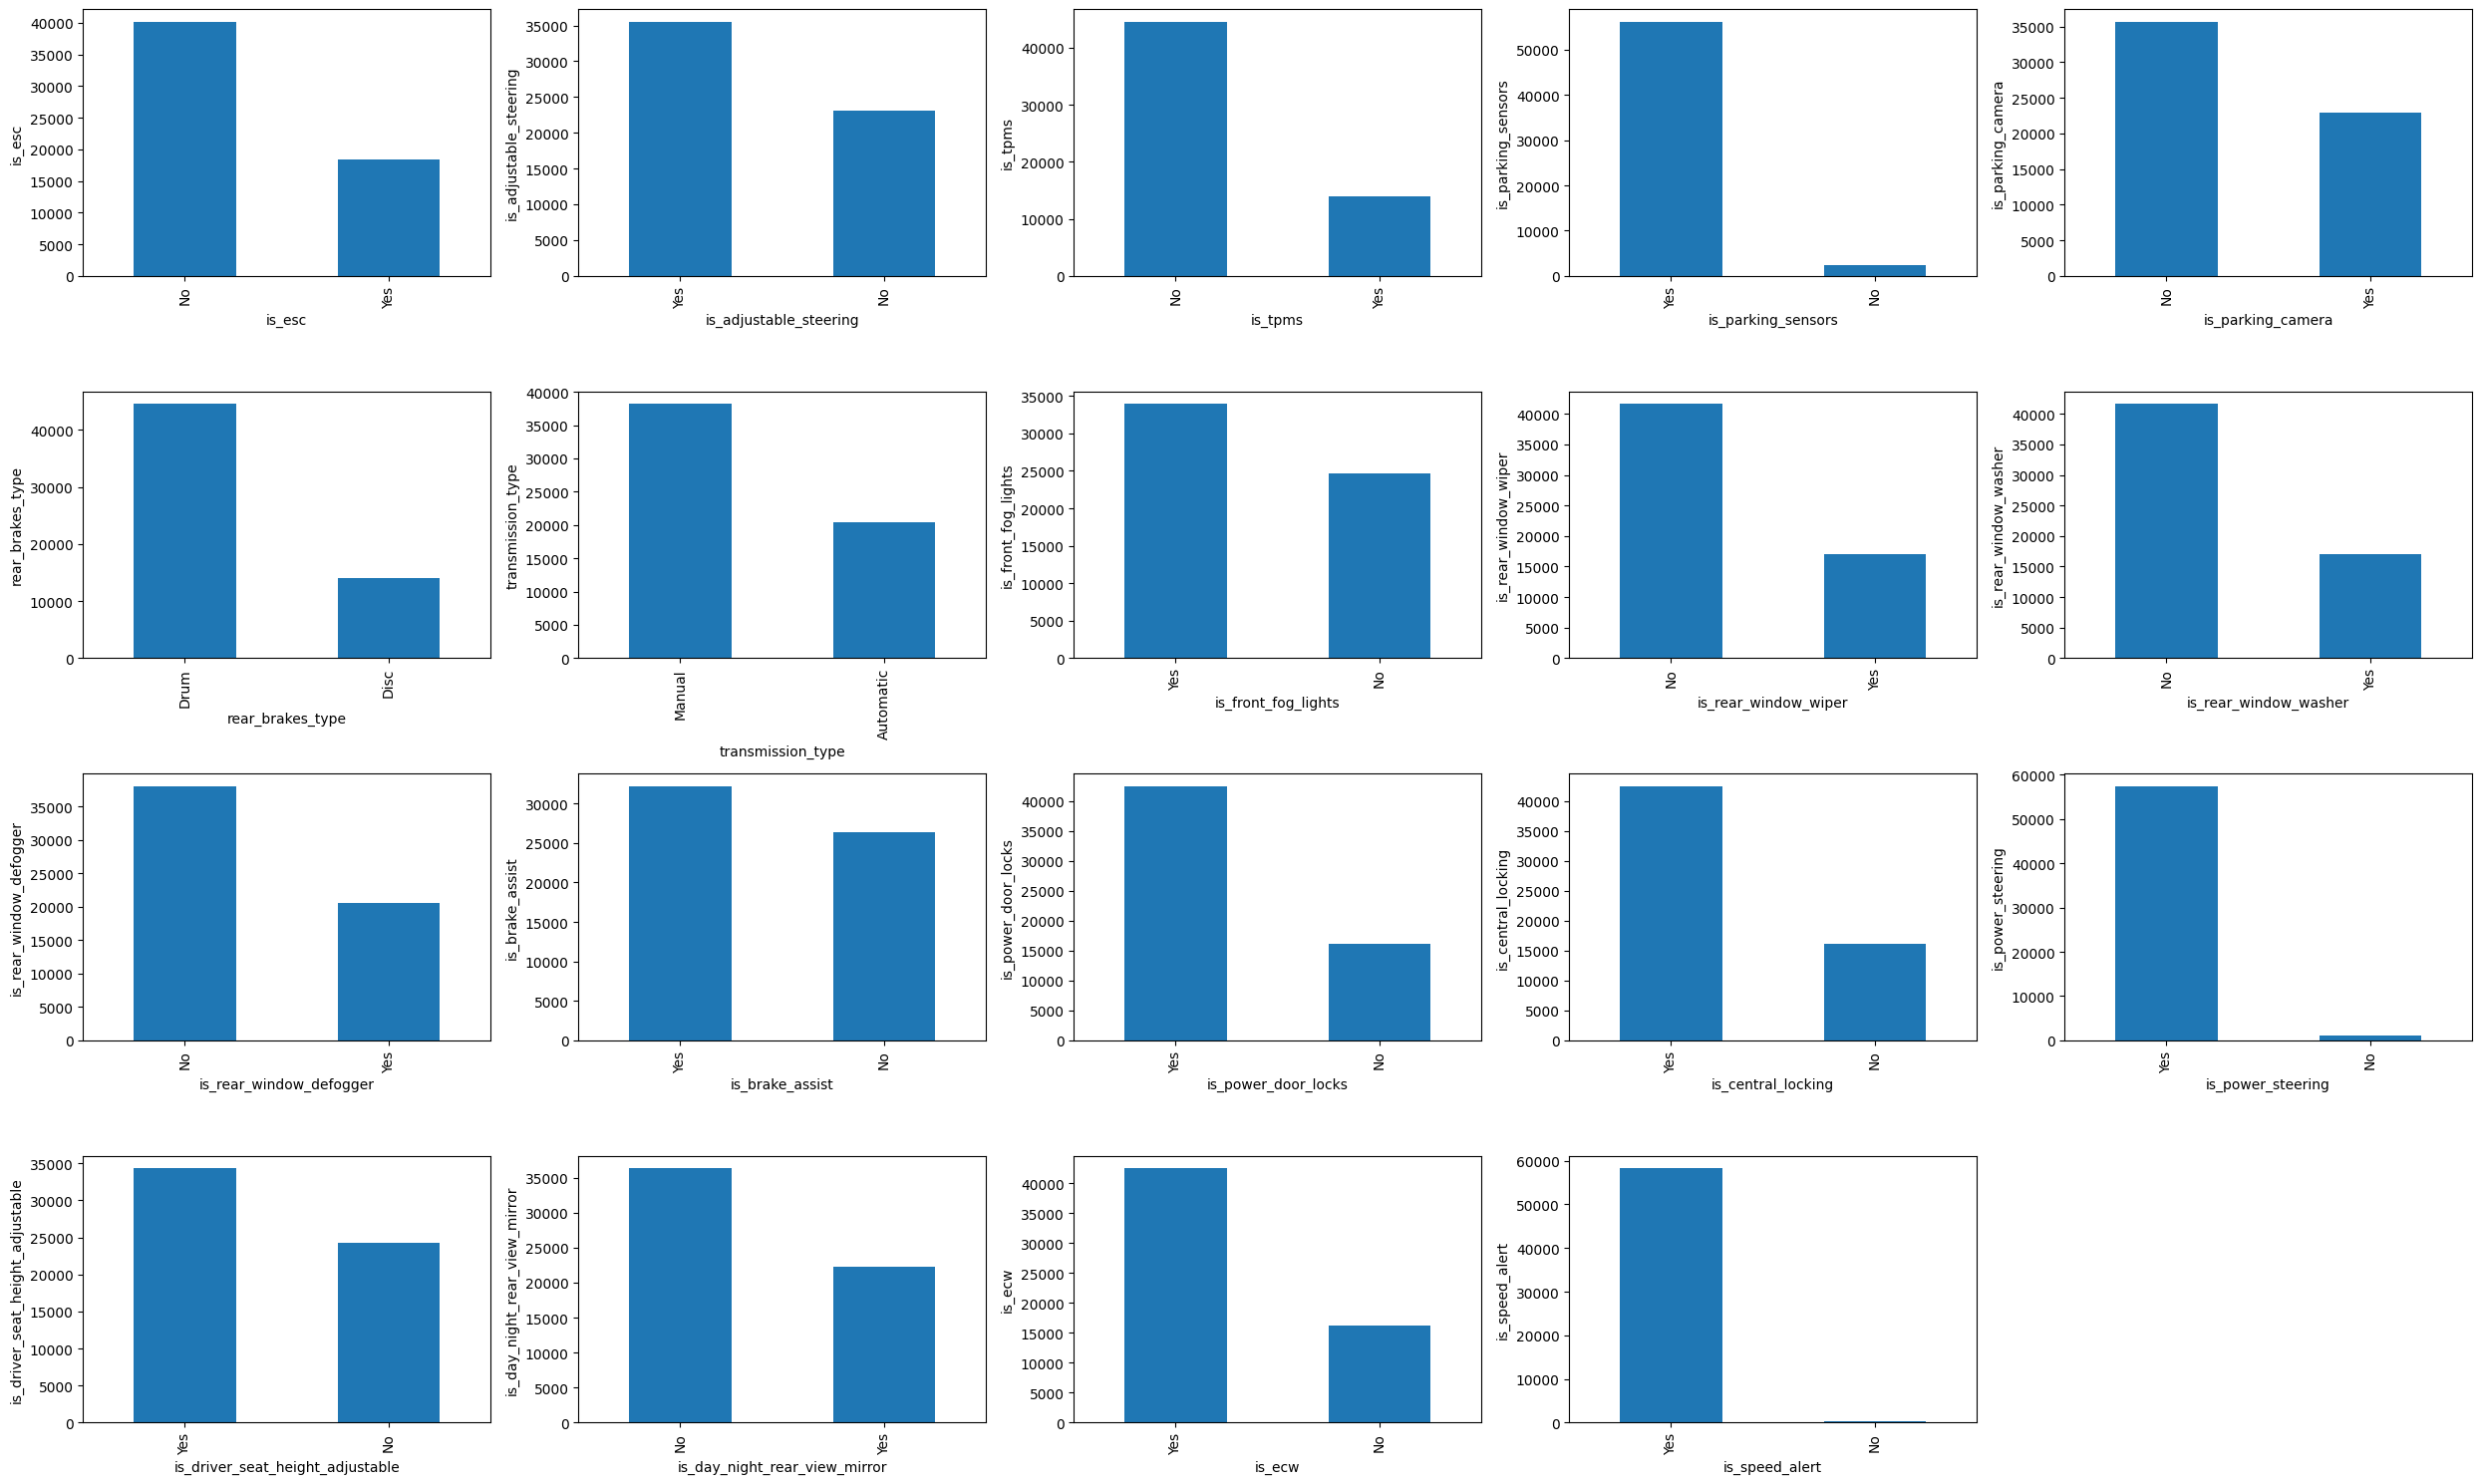

In [30]:
viz(predictors, lo_card, 4, 5)

***Insight***

- There are 19 features with low cardinality present in the sample space.
- Aside the `rear_brakes_type` and the `transmission_type` low cardinality features, all the other features are boolean indicators.
- From the visualization above, some pairs of features seem to be directly collinear to one another. Investigate the `is_rear_window_washer` - `is_rear_window_wiper` and the `is_central_locking` - `is_power_door_locks` feature pairs.
- The `is_power_steering` and `is_speed_alert` features should also be considered redundant due to too many one-sided occurences.

In [31]:
#investigate the first collinear pair
predictors[['is_rear_window_washer', 'is_rear_window_wiper']].value_counts()

is_rear_window_washer  is_rear_window_wiper
No                     No                      41634
Yes                    Yes                     16958
Name: count, dtype: int64

In [32]:
#investigate the second collinear pair
predictors[['is_central_locking', 'is_power_door_locks']].value_counts()

is_central_locking  is_power_door_locks
Yes                 Yes                    42435
No                  No                     16157
Name: count, dtype: int64

In [33]:
#update the low cardinality features
for i in ['is_rear_window_washer', 'is_power_door_locks', 'is_power_steering', 'is_speed_alert']:
    lo_card.remove(i)

In [34]:
lo_card

['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_central_locking',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw']

**Medium cardinality features**

In [35]:
len(mid_card)

5

In [36]:
predictors[mid_card].head()

,segment,fuel_type,max_torque,max_power,steering_type
0,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,Power
1,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,Power
2,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,Power
3,C1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,Electric
4,A,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,Electric


In [37]:
#determine the number of unique values
predictors[mid_card].nunique()

segment          6
fuel_type        3
max_torque       9
max_power        9
steering_type    3
dtype: int64

From the above output, inspect the last four features.

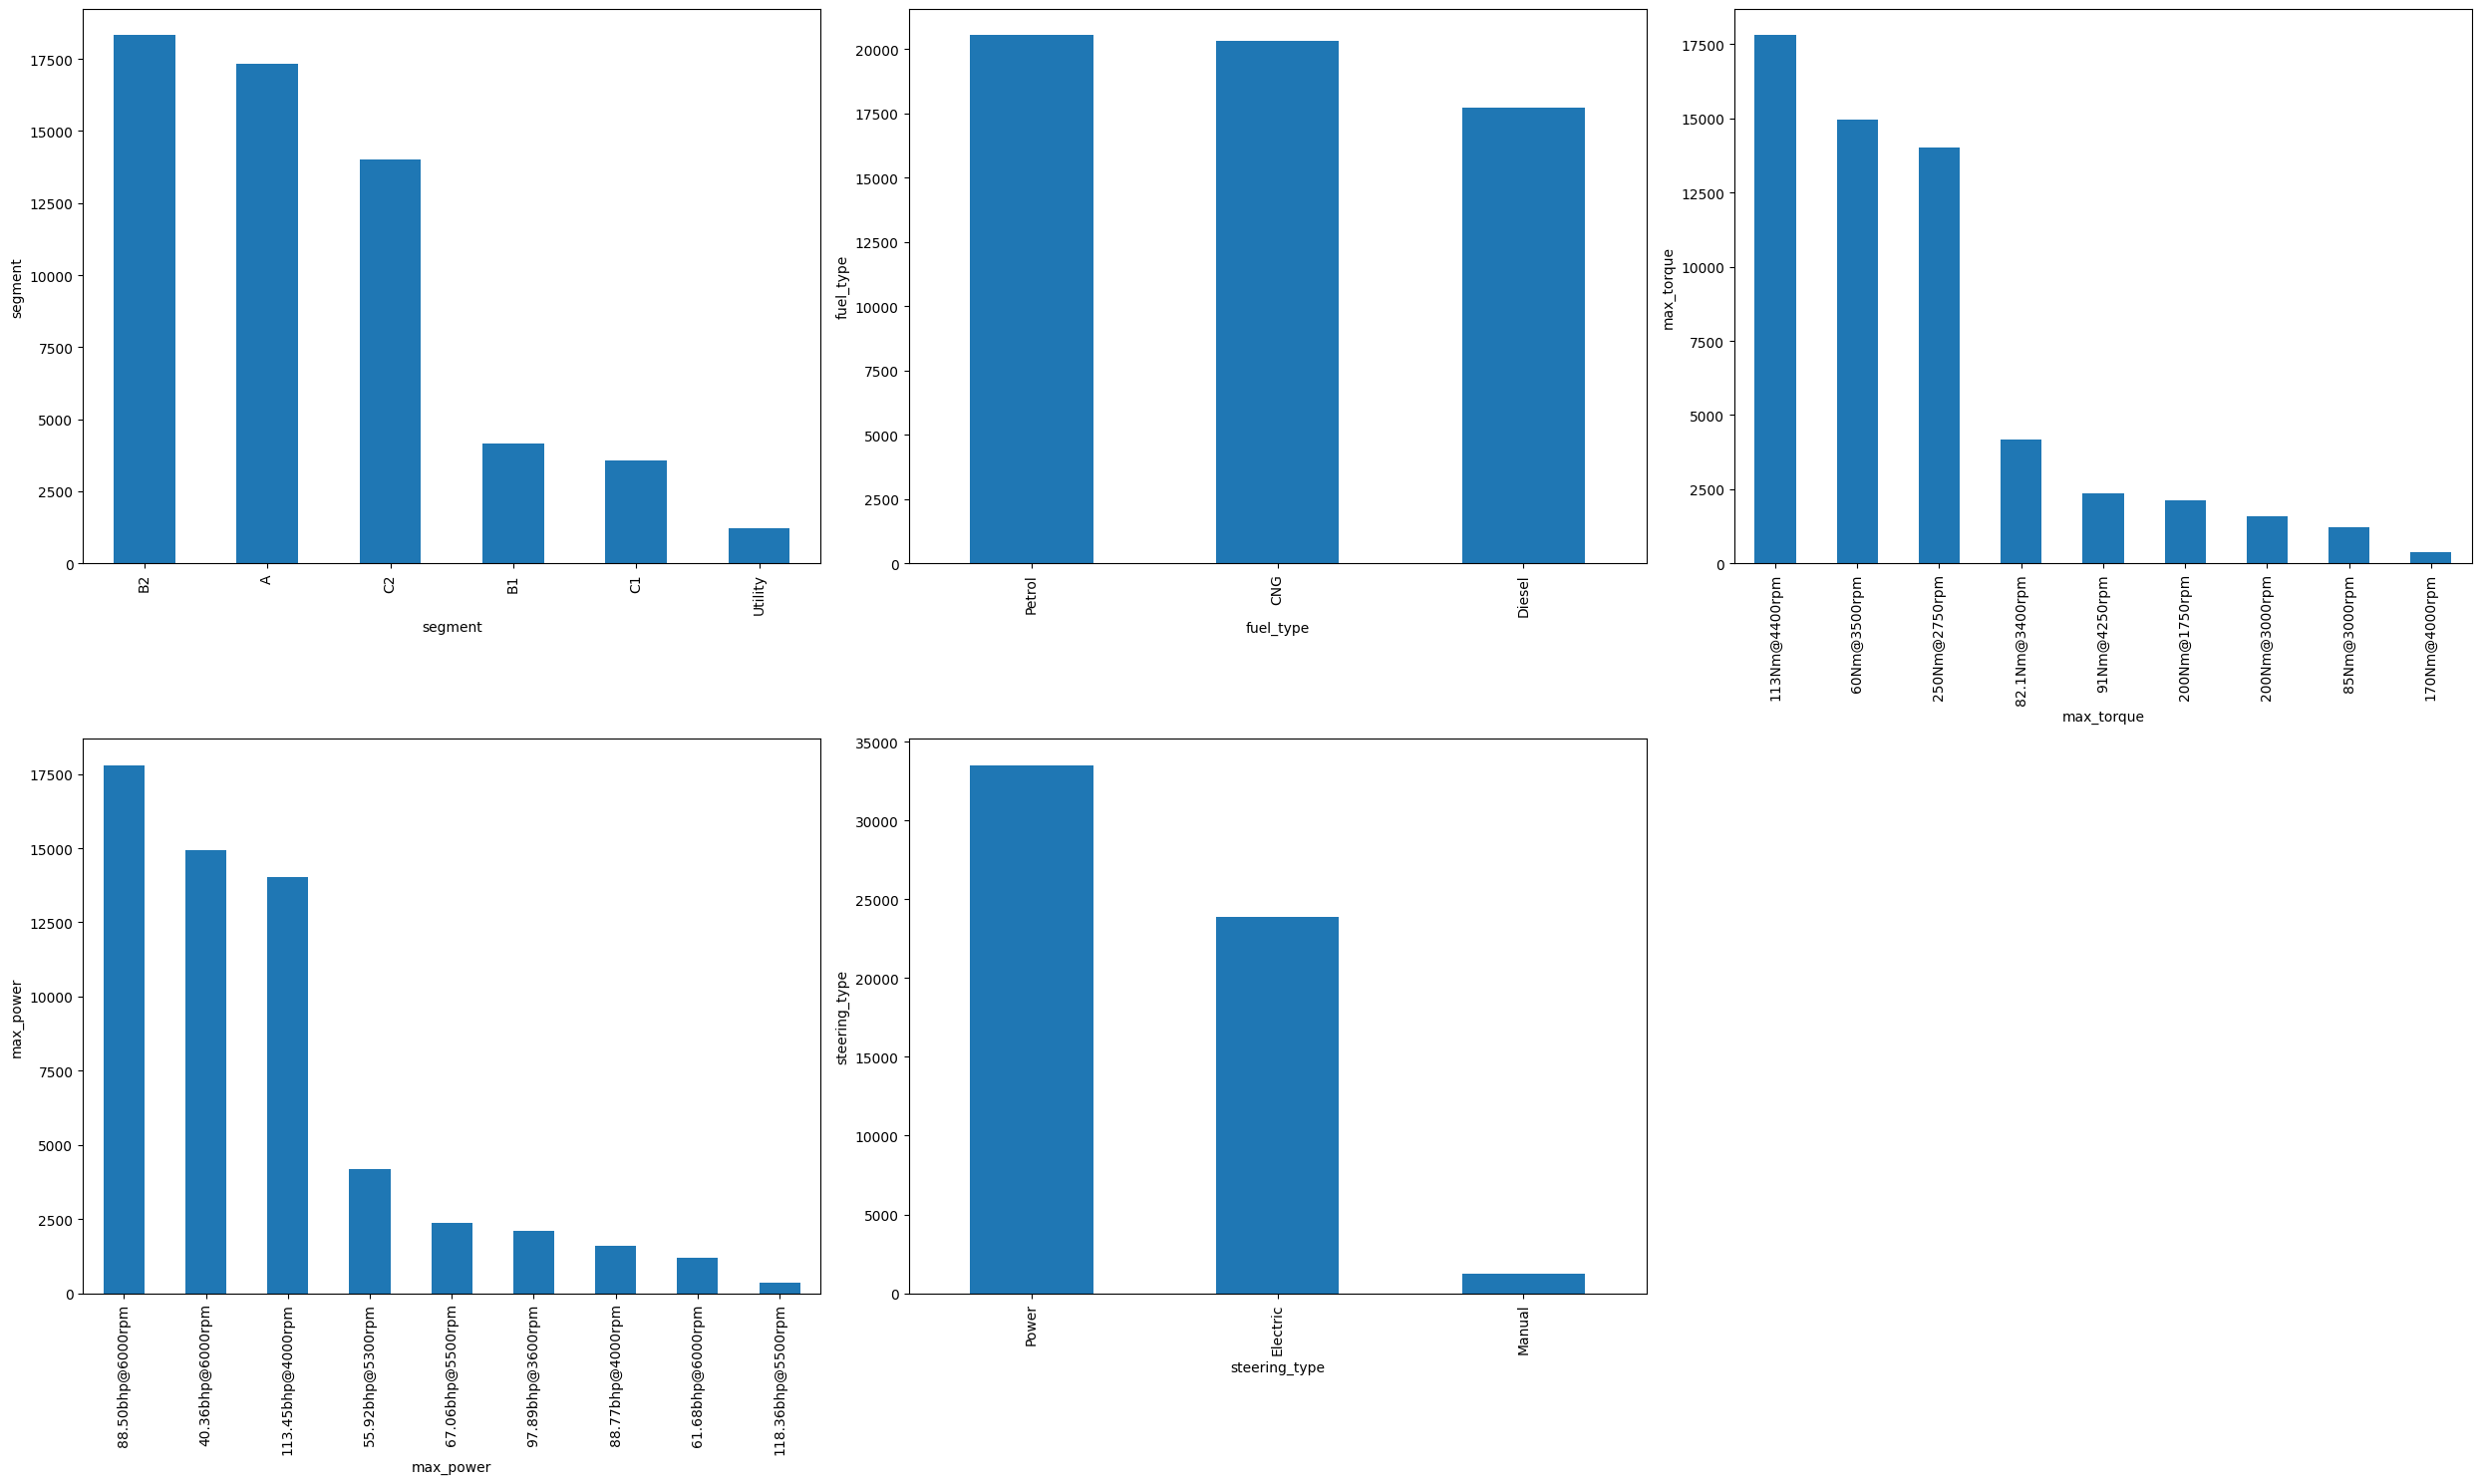

In [38]:
#visualizing the medium cardinality features.
viz(predictors, mid_card, 2, 3)

***Insight***

- All medium cardinality features have the presence of rare values, except the `fuel_type` feature. Create a list of such features and inspect during preprocessing.
- The `max_power` and `max_torque` features seem to be collinear to each other. Set the `max_power` feature as redundant.
- The `max_torque` feature contains numerical signal. Extract this information.

In [39]:
rare_cols = mid_card.copy()

In [40]:
rare_cols

['segment', 'fuel_type', 'max_torque', 'max_power', 'steering_type']

In [41]:
rare_cols.remove('fuel_type')
rare_cols.remove('max_power')

In [42]:
#update the medium cardinality features
mid_card.remove('max_power')

In [43]:
mid_card

['segment', 'fuel_type', 'max_torque', 'steering_type']

**High cardinality features**

- Remove the `policy_id` feature.

In [44]:
hi_card

['policy_id', 'area_cluster', 'model', 'engine_type']

In [45]:
hi_card.remove('policy_id')

In [46]:
predictors[hi_card].head()

,area_cluster,model,engine_type
0,C1,M1,F8D Petrol Engine
1,C2,M1,F8D Petrol Engine
2,C3,M1,F8D Petrol Engine
3,C4,M2,1.2 L K12N Dualjet
4,C5,M3,1.0 SCe


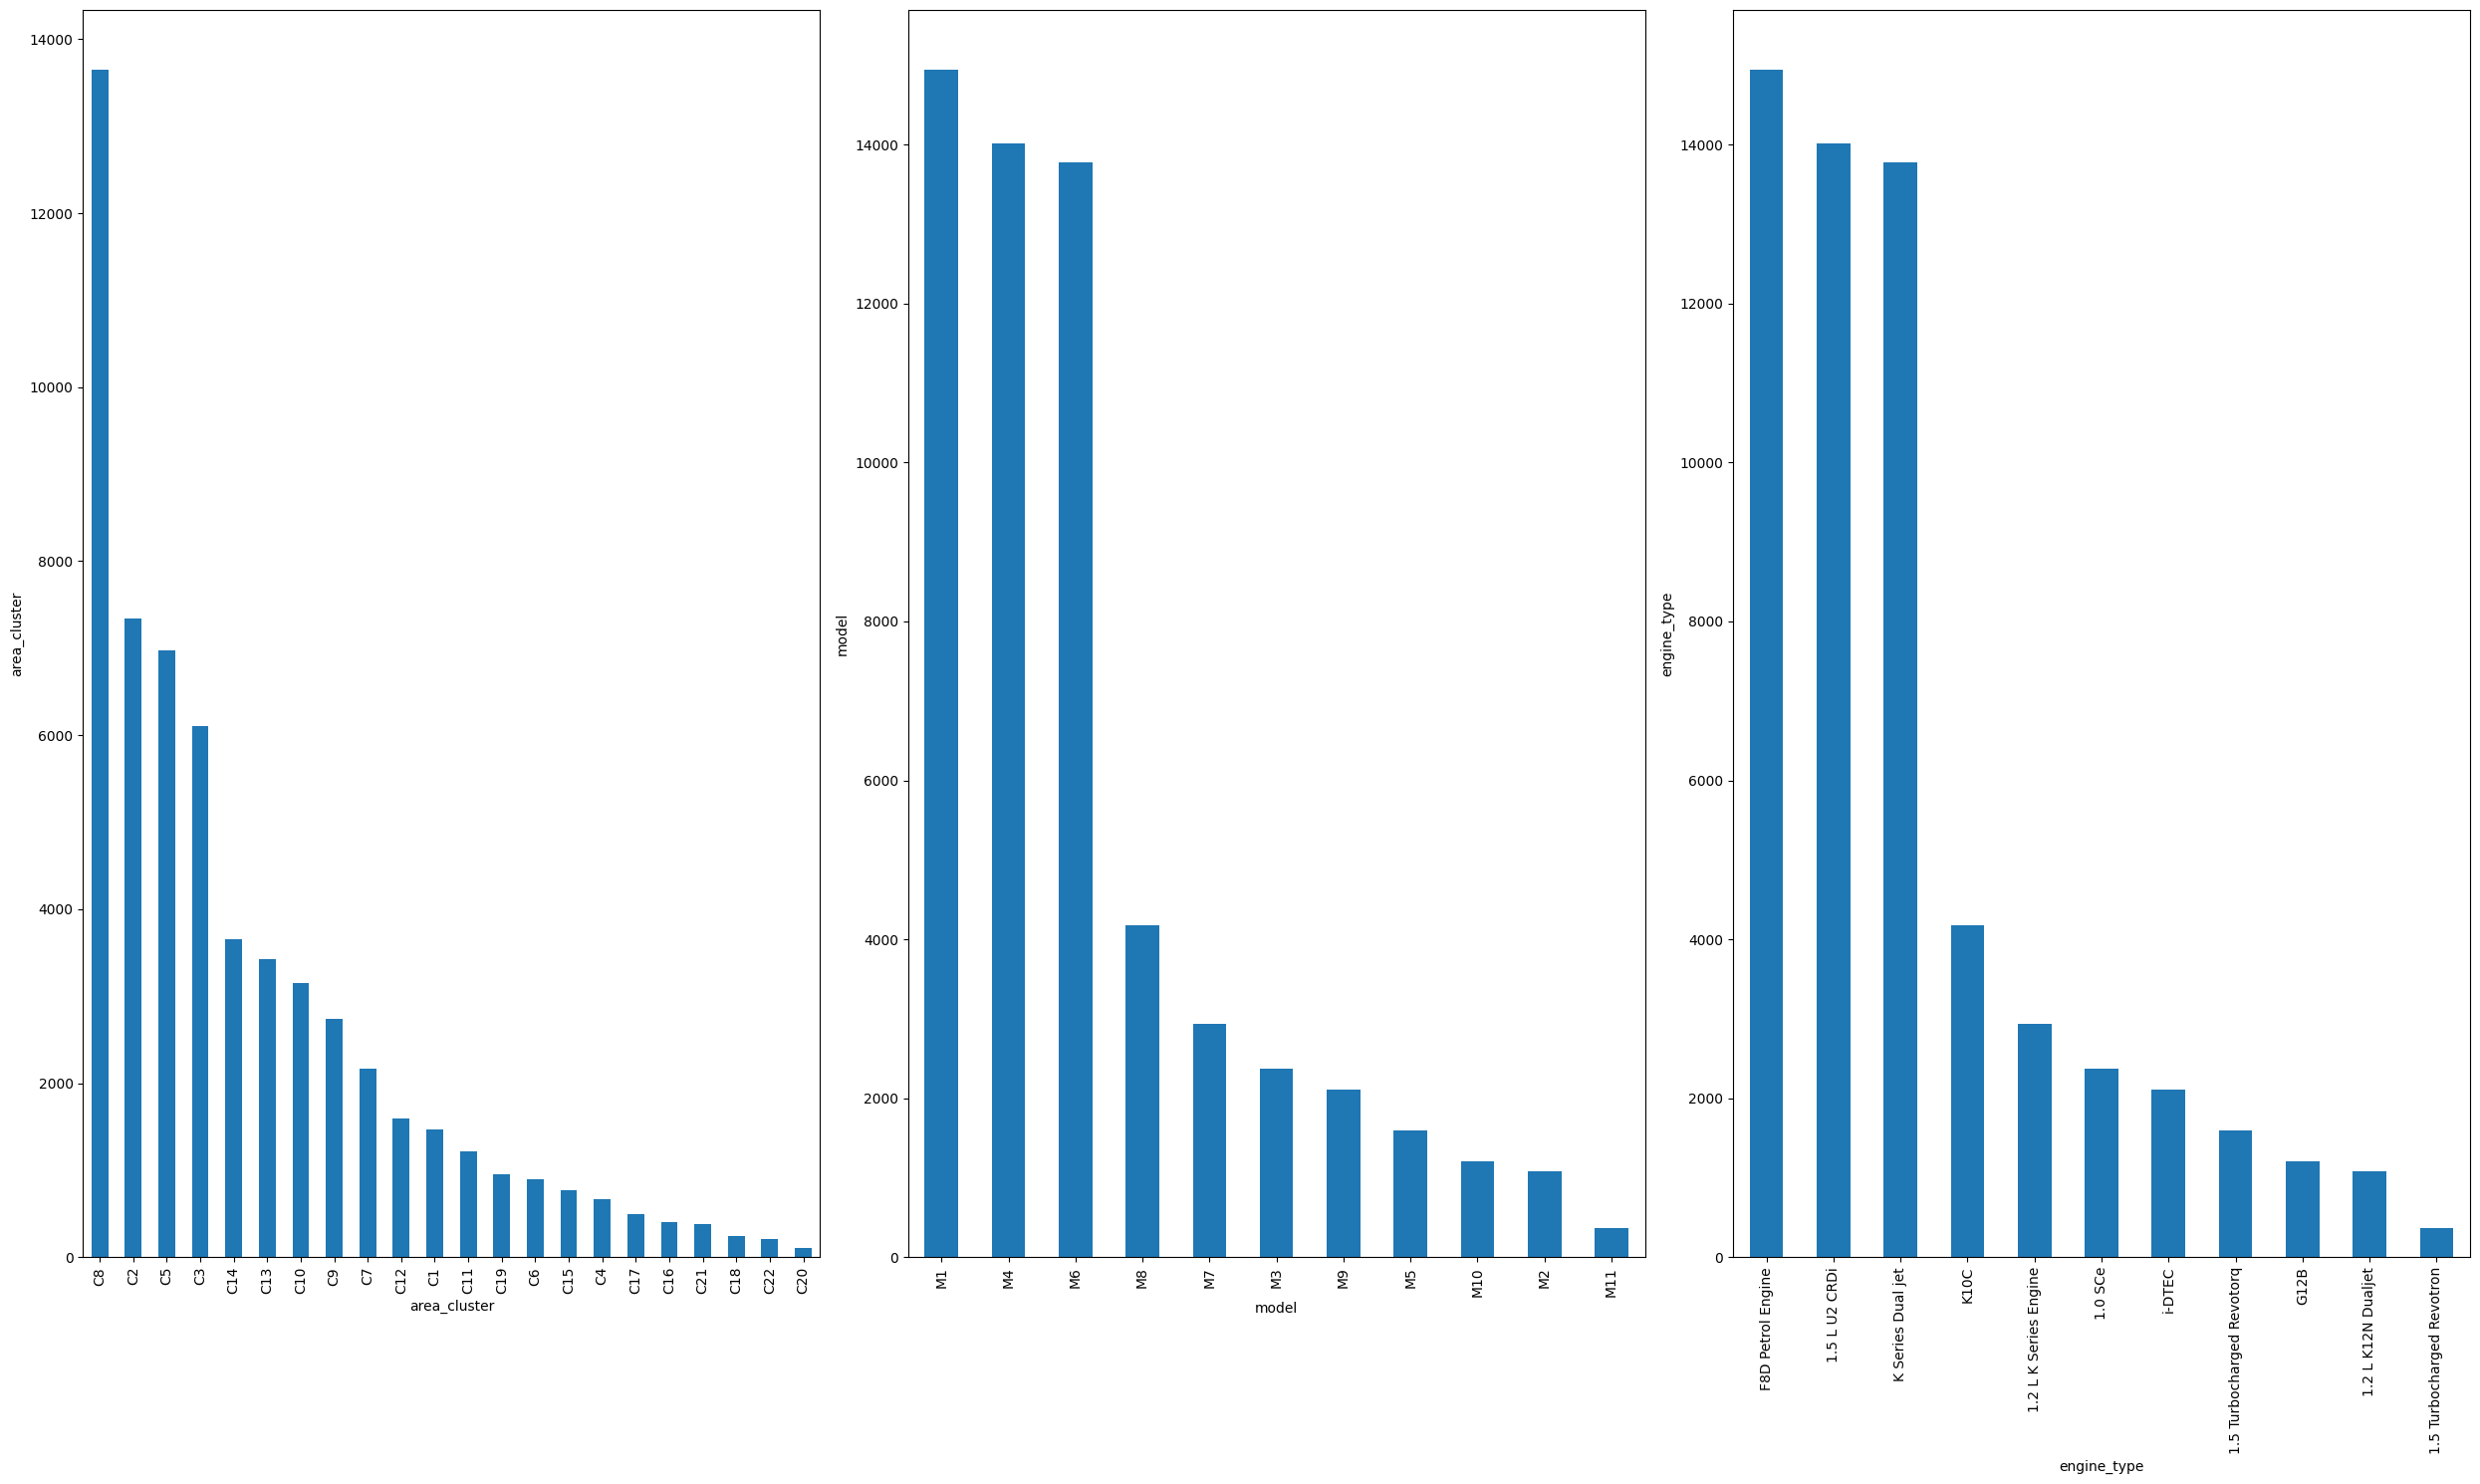

In [47]:
#check the number of unique values
viz(predictors, hi_card, 1, 3)

***Insight***

- The `policy_id` feature had unique elements for each sample and was considered redundant to the predictive algorithm.
- The `model` and the `engine_type` features are collinear to each other. The `engine_type` feature should be considered as redundant.
- From the visualization, all the high cardinality features contained rare values.

In [48]:
#remove redundant features
hi_card.remove('engine_type')
hi_card

['area_cluster', 'model']

In [49]:
#update the rare feature list
for col in hi_card:
    rare_cols.append(col)

In [50]:
#confirm
rare_cols

['segment', 'max_torque', 'steering_type', 'area_cluster', 'model']

In [51]:
#updating the categorical features
categorical_features = lo_card + mid_card + hi_card
categorical_features

['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_central_locking',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'segment',
 'fuel_type',
 'max_torque',
 'steering_type',
 'area_cluster',
 'model']

#### 4.1.2) Extract numerical information

- Analyse the `max_torque` feature.

In [52]:
predictors['max_torque'].unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

***Insight***

- Due to the nature of the `max_torque` feature, categorical encoding should be preferred to numerical signal extraction.

In [53]:
len(categorical_features)

21

After initial analysis, the categorical features have been reduced to 21.

### 4.2) Numerical features

- Three numerical features have already been scaled by the author. These features are; `policy_tenure`, `age_of_car` and `age_of_policyholder`.
- Investigate the type of scaling method used and apply to the remaining numerical features.

#### 4.2.1) Check distribution of numerical features

In [54]:
numerical_features

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating']

In [55]:
len(numerical_features)

15

In [56]:
predictors[numerical_features].head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2


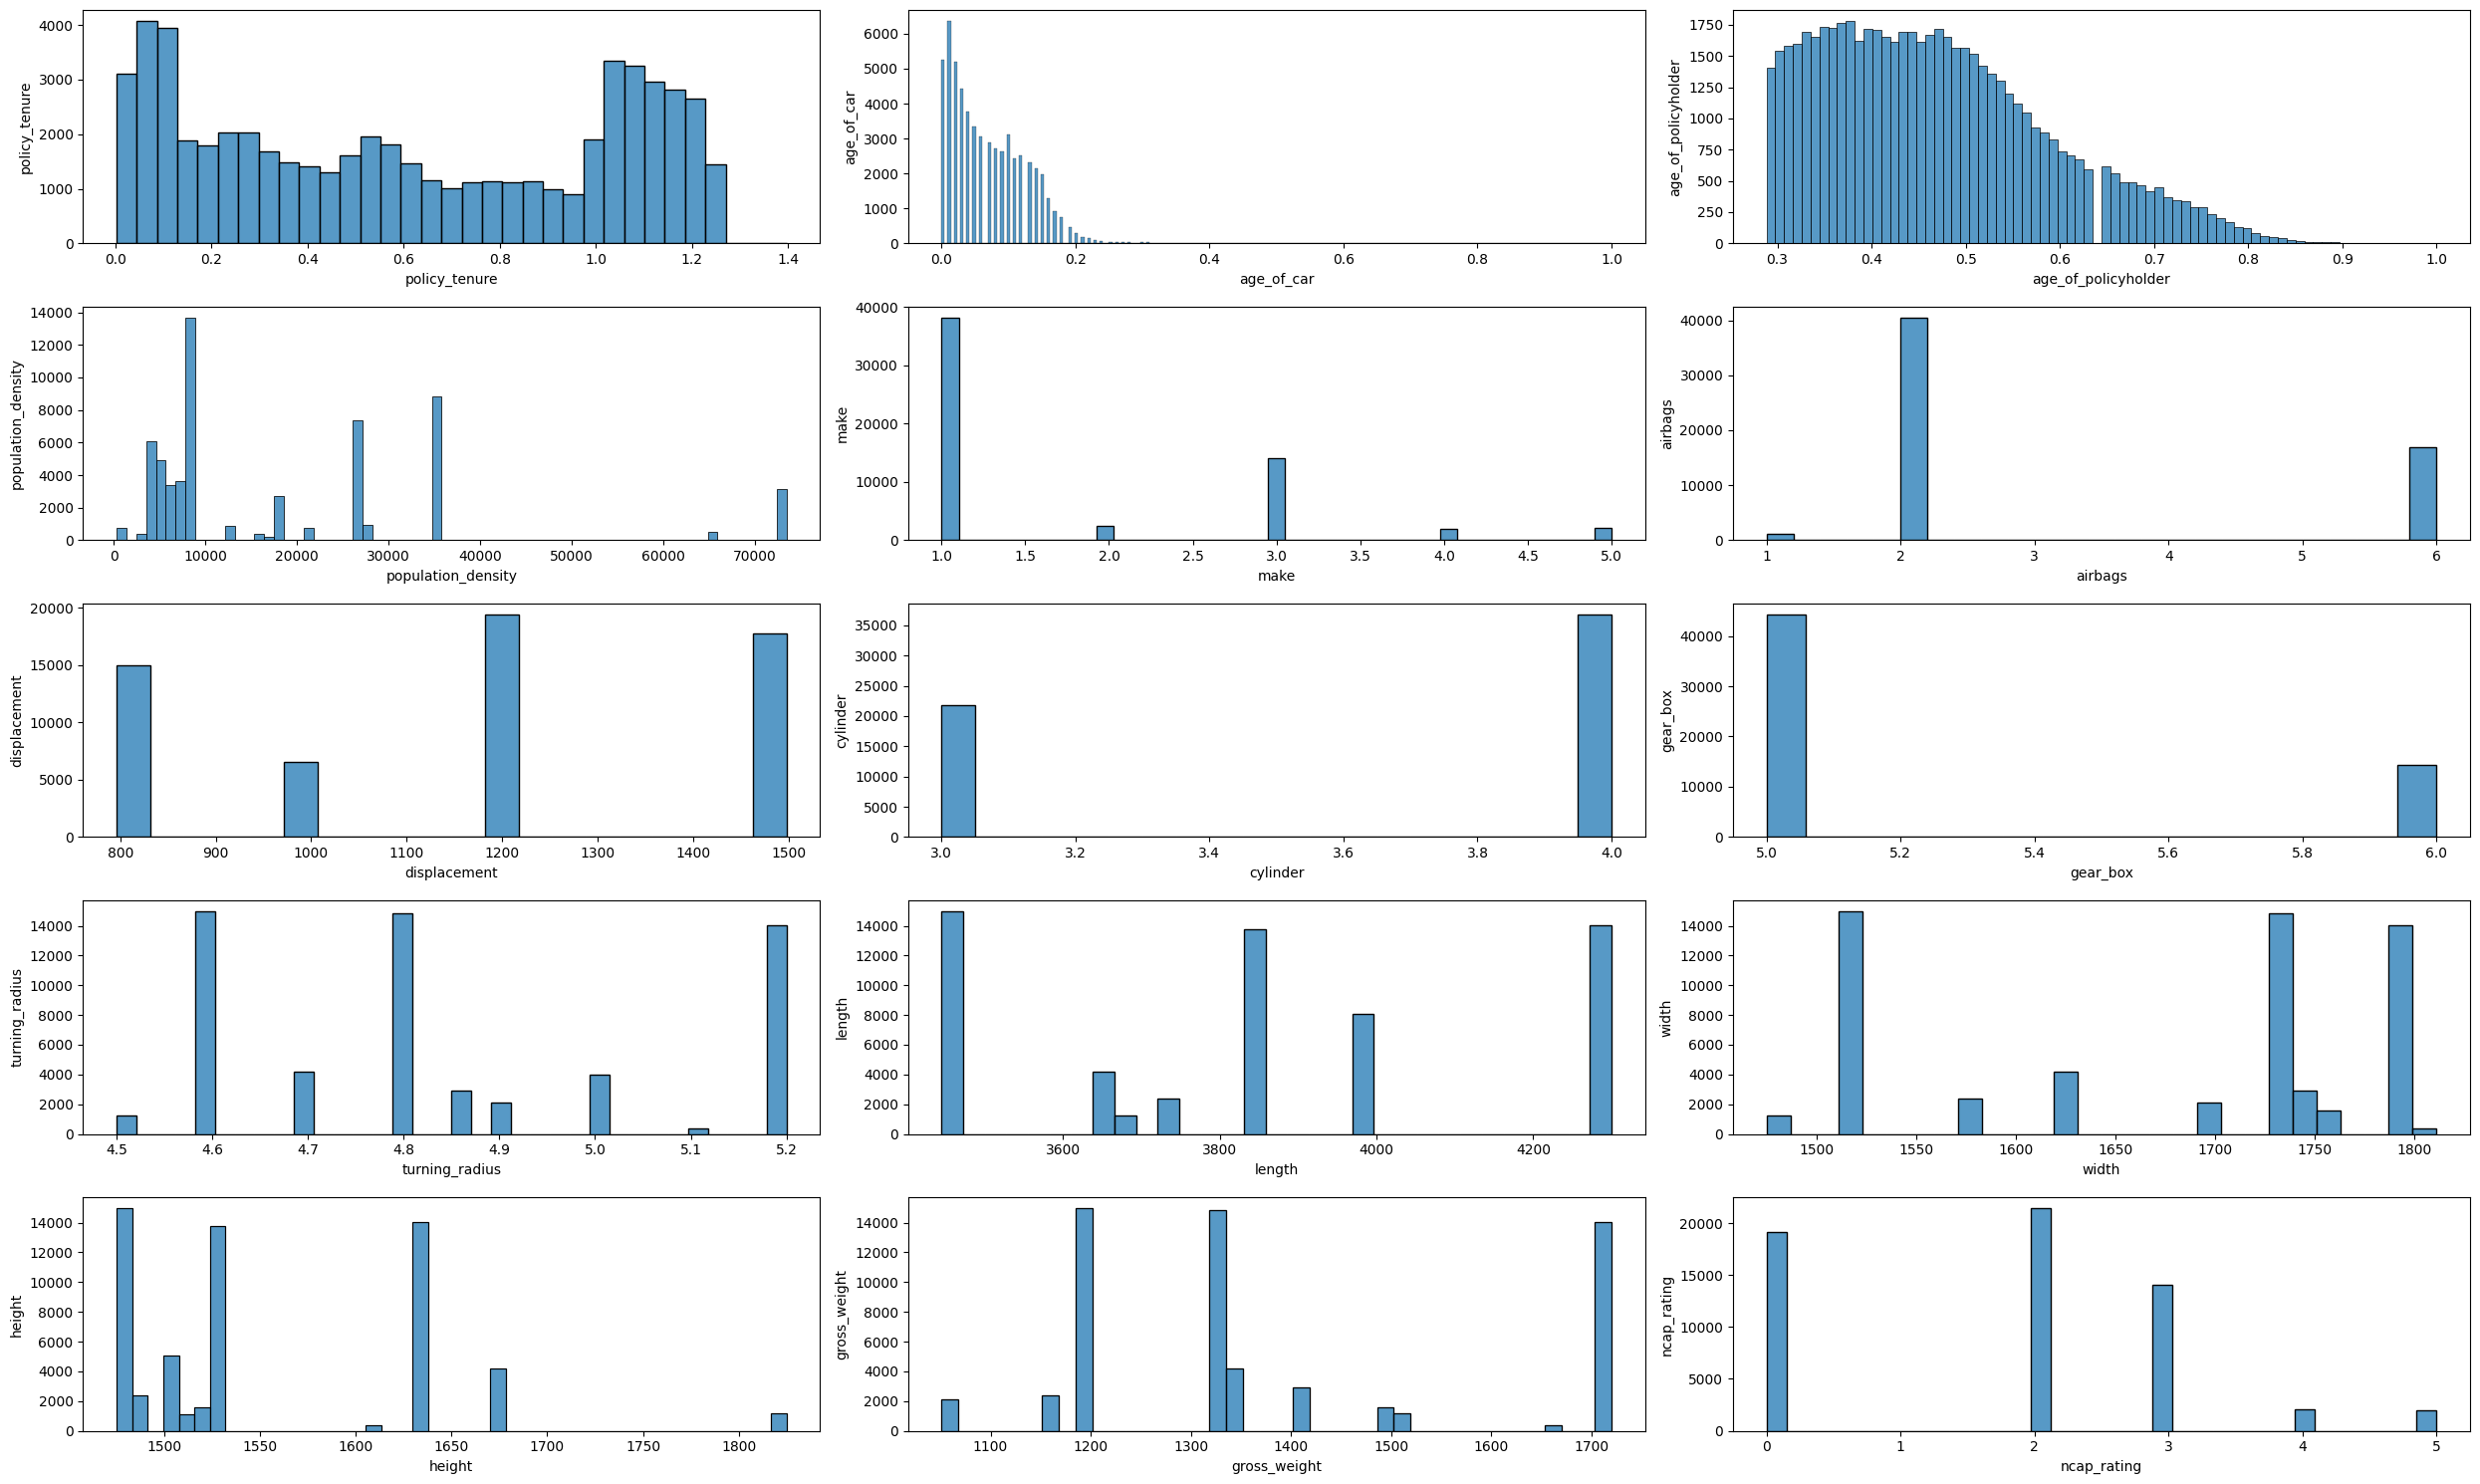

In [57]:
#check for the distribution of numerical features
plt.figure(figsize=(25, 15))

for i, col in enumerate(predictors[numerical_features].columns.to_list()):
    plt.subplot(5,3, i+1)
    sns.histplot(predictors[col])
    plt.ylabel(col)
plt.tight_layout()

plt.show()

***Insight***

- Most numerical features have a comb distribution.
- Just two numerical feature have their distributions skewed to the left.
- There were no repetitive distributions for the numerical features.

#### 4.2.2) Outliers

- Visualize and identify any outliers in the numerical features
- Determine the values for respective capping methods.

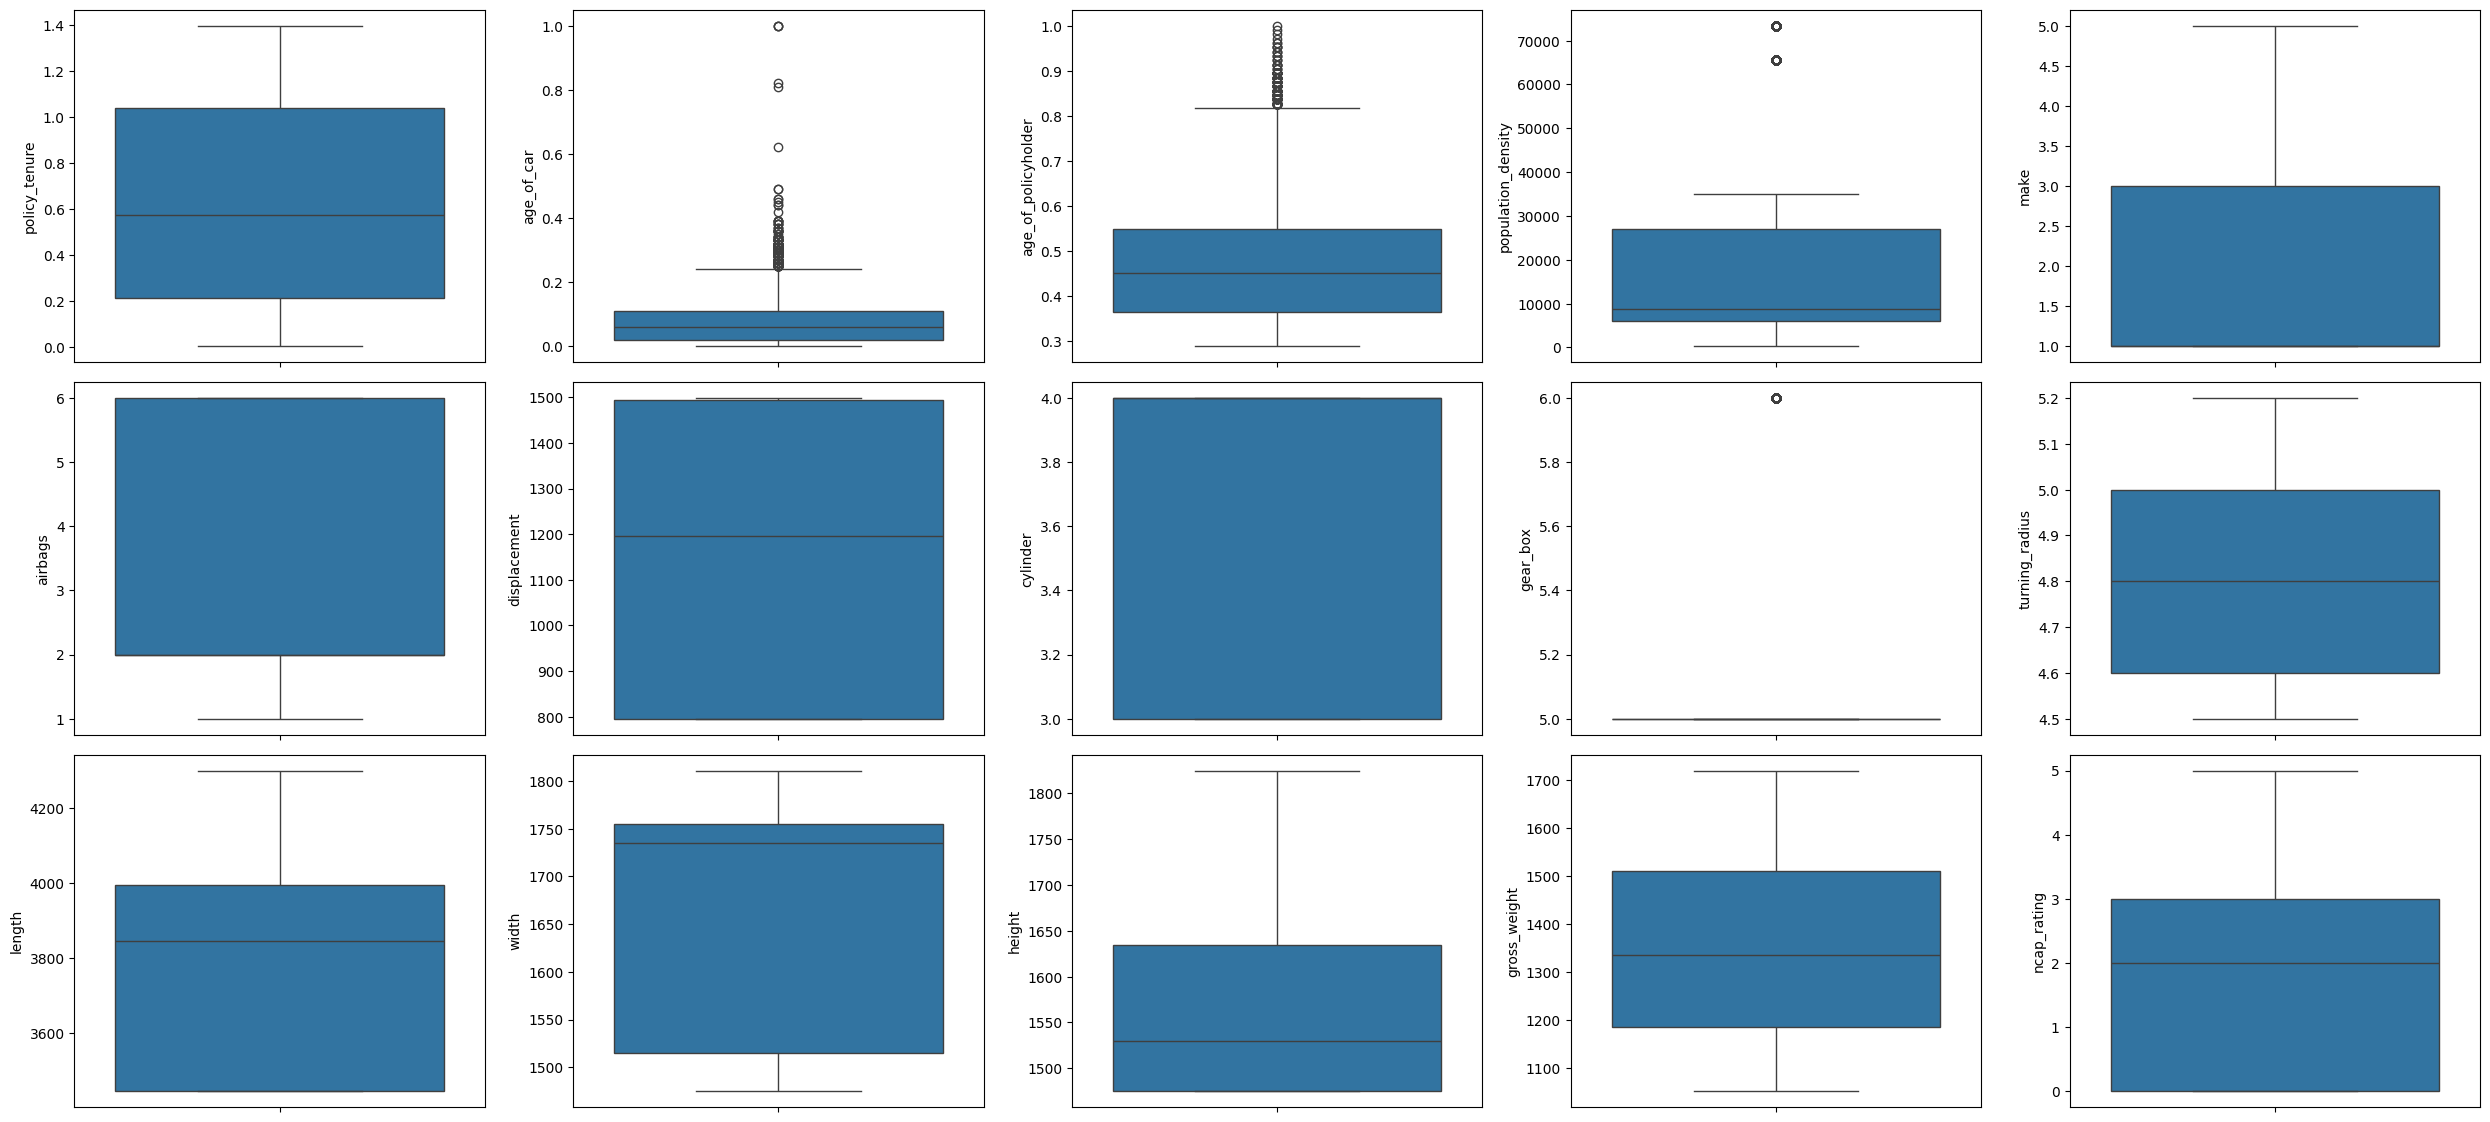

In [58]:
#visualize the outliers
plt.figure(figsize=(25, 15))

for i, col in enumerate(numerical_features):
    plt.subplot(4,5, i+1)
    sns.boxplot(y=col, data=predictors[numerical_features])
    plt.ylabel(col)
plt.tight_layout()

plt.show()

In [59]:
#create a list containing outliers
out_cols = []   

In [60]:
#generate function to relay outlier info
def IQR_Outliers(x, features):
    
    print('Number of features: ', len(features))
    print('Features: ', features)

    #sample size
    print('Number of samples: ', x.shape[0])
    
        
    for col in features:
       
        #calculate the percentile
        Q1 = np.nanpercentile(x[col], 25.)
        Q3 = np.nanpercentile(x[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)
                
        outliers = x[col][(x[col] < lower) | (x[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        
        #obtain the cols with outliers
        if len(outliers) > 0:
            out_cols.append(col)

In [61]:
IQR_Outliers(predictors, numerical_features)

Number of features:  15
Features:  ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating']
Number of samples:  58592

Feature:  policy_tenure
Upper and Lower limits:  2.2823861752593593 -1.033032345417099
Number of outliers:  0

Feature:  age_of_car
Upper and Lower limits:  0.245 -0.115
Number of outliers:  269

Feature:  age_of_policyholder
Upper and Lower limits:  0.822115384615385 0.09134615384615291
Number of outliers:  221

Feature:  population_density
Upper and Lower limits:  58339.5 -25224.5
Number of outliers:  3647

Feature:  make
Upper and Lower limits:  6.0 -2.0
Number of outliers:  0

Feature:  airbags
Upper and Lower limits:  12.0 -4.0
Number of outliers:  0

Feature:  displacement
Upper and Lower limits:  2538.5 -249.5
Number of outliers:  0

Feature:  cylinder
Upper and Lower limits:  5.5 1.5
Number of outliers:  0


In [62]:
out_cols

['age_of_car', 'age_of_policyholder', 'population_density', 'gear_box']

In [63]:
predictors[out_cols].min()

age_of_car               0.000000
age_of_policyholder      0.288462
population_density     290.000000
gear_box                 5.000000
dtype: float64

In [64]:
predictors[out_cols].nunique()

age_of_car             49
age_of_policyholder    75
population_density     22
gear_box                2
dtype: int64

In [65]:
#inspect the gear box feature
predictors.gear_box.value_counts()

gear_box
5    44211
6    14381
Name: count, dtype: int64

In [66]:
#create a dictionary for outlier values
out_dict = {
    'age_of_car' : [0.245, -0.115],
    'age_of_policyholder' : [0.822, 0.091],
    'population_density' : [58399.5, -25244.5]
}

***Insight***

- Four numerical features contain outliers.
- Since the `gear_box` feature has only two unique values, it will be disregarded as a feature with outliers.
- Aside the `age_of_policyholder` feaure, the remaining features containing outlier will be imputed with just the maximum capping method, since none of these features have values below zero.
- The `age_of_policyholder` feature will be encoded with maximum and minumum capping methods, using the upper and lower limits.

In [67]:
#update the outlier feature list
out_cols.remove('gear_box')

#### 4.2.3) Check redundant numerical features

In [68]:
predictors[numerical_features].head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2


In [70]:
predictors[numerical_features].nunique()

policy_tenure          58592
age_of_car                49
age_of_policyholder       75
population_density        22
make                       5
airbags                    3
displacement               9
cylinder                   2
gear_box                   2
turning_radius             9
length                     9
width                     10
height                    11
gross_weight              10
ncap_rating                5
dtype: int64

In [75]:
#examine
predictors[['displacement', 'turning_radius', 'length']].value_counts()

displacement  turning_radius  length
796           4.60            3445      14948
1493          5.20            4300      14018
1197          4.80            3845      13776
998           4.70            3655       4173
1197          4.85            3990       2940
999           5.00            3731       2373
1498          4.90            3995       2114
1497          5.00            3990       1598
1196          4.50            3675       1209
1197          4.80            3995       1080
1199          5.10            3993        363
Name: count, dtype: int64

In [73]:
predictors[['width', 'gross_weight']].value_counts()

width  gross_weight
1515   1185            14948
1735   1335            14856
1790   1720            14018
1620   1340             4173
1745   1410             2940
1579   1155             2373
1695   1051             2114
1755   1490             1598
1475   1510             1209
1811   1660              363
Name: count, dtype: int64

In [74]:
predictors[['cylinder', 'gear_box']].value_counts()

cylinder  gear_box
4         5           22717
3         5           21494
4         6           14018
3         6             363
Name: count, dtype: int64

***Insight***

- For the numerical features, a lot of features are closely correlated, however, it's just the `gross_weight` and `width` features that are collinear.
- Set the `width` feature as redundant and keep the remaining numerical features.

In [76]:
#update the numerical features
numerical_features.remove('width')

### 5) Final analysis

- Ensure numerical and categorical features do not relay the same information in the predictor variables
- Check which numerical and categorical features have the same number of unique values.
- Investigate the distribution of such features.


In [93]:
predictors[lo_card + mid_card + hi_card + numerical_features].head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_defogger,...,make,airbags,displacement,cylinder,gear_box,turning_radius,length,height,gross_weight,ncap_rating
0,No,No,No,Yes,No,Drum,Manual,No,No,No,...,1,2,796,3,5,4.6,3445,1475,1185,0
1,No,No,No,Yes,No,Drum,Manual,No,No,No,...,1,2,796,3,5,4.6,3445,1475,1185,0
2,No,No,No,Yes,No,Drum,Manual,No,No,No,...,1,2,796,3,5,4.6,3445,1475,1185,0
3,Yes,Yes,No,Yes,Yes,Drum,Automatic,Yes,No,Yes,...,1,2,1197,4,5,4.8,3995,1515,1335,2
4,No,No,No,No,Yes,Drum,Automatic,No,No,No,...,2,2,999,3,5,5.0,3731,1490,1155,2


In [95]:
predictors[lo_card + mid_card + hi_card + numerical_features].nunique()

is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
transmission_type                       2
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_defogger                 2
is_brake_assist                         2
is_central_locking                      2
is_driver_seat_height_adjustable        2
is_day_night_rear_view_mirror           2
is_ecw                                  2
segment                                 6
fuel_type                               3
max_torque                              9
steering_type                           3
area_cluster                           22
model                                  11
policy_tenure                       58592
age_of_car                             49
age_of_policyholder               

In [83]:
predictors[['area_cluster', 'population_density']].value_counts()

area_cluster  population_density
C8            8794                  13654
C2            27003                  7342
C5            34738                  6979
C3            4076                   6101
C14           7788                   3660
C13           5410                   3423
C10           73430                  3155
C9            17804                  2734
C7            6112                   2167
C12           34791                  1589
C1            4990                   1468
C11           6108                   1212
C19           27742                   952
C6            13051                   890
C15           290                     771
C4            21622                   665
C17           65567                   492
C16           16206                   401
C21           3264                    379
C18           35036                   242
C22           16733                   207
C20           20905                   109
Name: count, dtype: int64

In [84]:
predictors[['height', 'model']].value_counts()

height  model
1475    M1       14948
1635    M4       14018
1530    M6       13776
1675    M8        4173
1500    M7        2940
1490    M3        2373
1501    M9        2114
1523    M5        1598
1825    M10       1209
1515    M2        1080
1606    M11        363
Name: count, dtype: int64

In [86]:
hi_card

['area_cluster', 'model']

- The highly cardinal features have numerical features relaying the same information.
- Include these features for redundancy.

In [87]:
#update features
cat = lo_card + mid_card
initial_features = numerical_features + cat

In [88]:
len(initial_features)

33

In [ ]:
initial_features

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_central_locking',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'segment',
 'fuel_type',
 'max_torque',
 'steering_type',
 'area_cluster',
 'model']

In [ ]:
predictors[initial_features].head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,segment,fuel_type,max_torque,steering_type,area_cluster,model
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,...,No,No,No,No,A,CNG,60Nm@3500rpm,Power,C1,M1
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,...,No,No,No,No,A,CNG,60Nm@3500rpm,Power,C2,M1
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,...,No,No,No,No,A,CNG,60Nm@3500rpm,Power,C3,M1
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,...,Yes,Yes,Yes,Yes,C1,Petrol,113Nm@4400rpm,Electric,C4,M2
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,...,Yes,No,Yes,Yes,A,Petrol,91Nm@4250rpm,Electric,C5,M3


In [ ]:
predictors[initial_features].nunique()

policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
population_density                     22
make                                    5
airbags                                 3
displacement                            9
cylinder                                2
gear_box                                2
turning_radius                          9
length                                  9
height                                 11
gross_weight                           10
ncap_rating                             5
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
transmission_type                       2
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_defogger           

In [92]:
#update rare_cols list
rare_cols.remove('area_cluster')
rare_cols.remove('model')